### In mood for a game? Let's do it!
Let's play a game that was great enough to take on Einstein! A game great enough to support one of the most 'weirdest' physical theories ever! A game great enough to be awarded the 2022 Nobel Prize in Physics! Yet a game easy enough to be comprehended and played by us, mere mortals! <br>

This is the <b>CHSH</b> game (named after the initials of the geniuses who invented it)! In the grand scheme of things, this game belongs to a class of (quantum, but we'll get there) games known as XOR games. <br>

### What is this game anyway?
This is a mathematical game, as opposed to stone-paper-scissors. W-Wait, that doesn't mean it's boring; it's actually quite interesting if you stay long enough to see it in action. <br> 

In our daily lives, we try to construct classical strategies for winning various games. CHSH, on the other hand, is a quantum game. What exactly are quantum games, you ask? Except for a few exceptions, quantum games are very similar to the multiplayer probabilistic games that people play in casinos.

1. You are not allowed to communicate while playing the game, but you may discuss strategies with your allies beforehand. I suppose that's fair?
2. You are permitted to utilise strategies that make use of quantum mechanics!

But why would anyone want to play a quantum game? Well, some very smart physicists went on to demonstrate that when using quantum strategies as opposed to classical ones, one has a better chance of winning some games [[4]](#references) (well, things are far more deep than this, but beyond the scope of this tutorial). <br>

### How do we play this game?
You'd need a partner for this game. Let's call you Alice and your teammate Bob. I'll be the referee. You (Alice) and your partner (Bob) compete with me (the referee). <br>

I, the referee will randomly choose two random numbers (out of $0$ or $1$) for both Alice and Bob. In turn, Alice and Bob must return a number (again out of $0$ or $1$). If input for both Alice and Bob is $1$, they must return differing outputs. In all other cases, their outputs must be identical. Let's put it all together mathematically:
$$x * y = a \oplus b$$ 
where $x$ is input to Alice and $y$ is input to Bob, whereas $a$ is output from Alice and $b$ is output from Bob. Is that all? Is it so trivial?

Nope... there's a catch \**wink*\* <br>

As previously stated, Alice and Bob are restricted to communicate during the game. I will transport both Alice and Bob to two different planets across the galaxy after they have decided on their strategy to ensure no communication (or, as physicists call it, non-locality or faster-than-light communication). Once they've settled into their new environment, I'll send them their input bits, and they'll have to send their outputs to me at the same time.

##### Now, we are ready to begin with the game!

<b>Disclaimer</b>: Before we get started, I'd like to point out that this tutorial will not go deep into the theory, so if you're unfamiliar with Quantum Information and Computation, I recommend going through [[1]](#references) and [[2]](#references). <hr>

> Note: At some points in this project, I have interchanged input/output with bits (in the case of classical techniques) or qubits (in case of quantum strategies). This is because "bits" is the term for units of information in the *business*. I apologise in advance if the language is unclear despite my best efforts to use consistent language.

<br>

Because we can't really transport you across the solar system (fuel prices are sky-high!), we'll play this game on computers. <br>
We'll play both the classical and quantum variants of the CHSH game, and this project will primarily focus on two strategies for both (there do exist more, though, see [[3]](#references). Finally, we will attempt to compare results from both variants and [spoiler alert] discover that quantum strategies win! <br> <br>
Let's fire up our computers and import all of the necessary packages and libraries.

In [1]:
'''libraries'''
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from collections import defaultdict
import pandas as pd
import random
from statistics import mode
from qiskit.tools.visualization import circuit_drawer
from qiskit.visualization import plot_histogram
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, transpile, Aer, IBMQ, execute
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams.update({'font.size': 12})

'''loading account and info.'''
account = IBMQ.load_account()
provider = IBMQ.providers()

'''setting parameters for quantum hardware'''
shots = 1 # set how many times the circuit is run, accumulating statistics about the measurement outcomes
# comp = account.get_backend('ibmq_quito')
sim = Aer.get_backend('aer_simulator')

Let's start with the **classical** variants of the game. I've explored two of the most popular techniques for Alice and Bob here.

#### Strategy 1: Random Output
Both Alice and Bob agree that they will return their outcomes based on a coin flip before blasting out to their destinations far out in the galaxy. They meet on common ground and decide that heads represents $0$ and tails represents $1$. It is important to remember that both of their coins are unbiased and identical. <br>
A careful inspection of the strategy reveals that randomness will only benefit Alice and Bob $50$% of the time! <br>
The spirit of this strategy is encapsulated in the function ```rand_CGame()``` below.

#### Strategy 2: Same Output Everytime
What if Alice and Bob decide to always return the same number, regardless of the inputs they receive? Without losing generality, let us suppose they decide to always return $0$. Is this technique better than the "Random Output" strategy? <br>
Indeed! Alice and Bob are likely to win the game three out of four times (or $75$% of the time) using this strategy! <br>
The ```samebit_Game()``` function is based on this strategy. <br>

Let us see how accurate we are...

In [2]:
'''Function for classical game with "random output bit" strategy'''
def rand_CGame(n_exp = 100):     # number of experiments

    n_win = 0   # number of times alice and bob win

    for i in range(n_exp):
        '''random input bit from the referee'''
        x, y = random.choices([0, 1], k = 2)

        '''random output bit from players'''
        a, b = random.choices([0, 1], k = 2)

        if ((x*y) == (a^b)):    # checking whether parties won the game
            n_win += 1
            
    return float(n_win/n_exp)

'''Function for classical game with "same output bit everytime" strategy'''
def samebit_CGame(a = 0, b = 0, n_exp = 100):   # default output bits from alice, bob = 0, 0
                                                # n_exp = number of experiments

    n_win = 0   # number of times alice and bob win

    for i in range(n_exp):
        '''random input bit from the referee'''
        x, y = random.choices([0, 1], k = 2)

        if ((x*y) == (a^b)):    # checking whether parties won the game
            n_win += 1
            
    return float(n_win/n_exp)

Mean Winning Probability =  0.50242


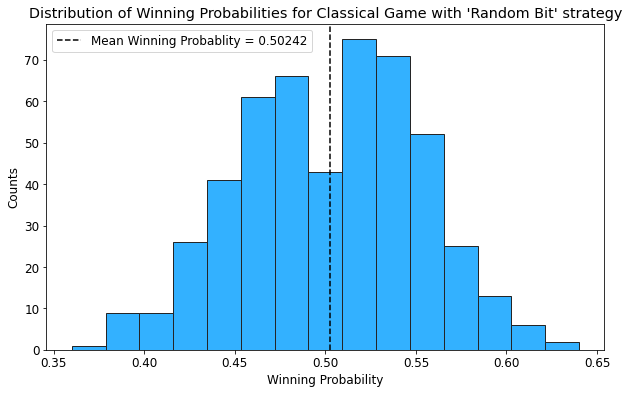

In [3]:
'''Playing classical game with random output bits'''
rand_c_res_arr = np.array([])
for i in range(500):
    res = rand_CGame()
    rand_c_res_arr = np.append(rand_c_res_arr, res)
rand_c_avg = np.mean(rand_c_res_arr)
print("Mean Winning Probability = ", rand_c_avg)

plt.figure("fig1"); 
plt.hist(rand_c_res_arr, bins = 15, histtype = 'bar', color = "#33B1FF", edgecolor = "#242526"); 
plt.axvline(x = rand_c_avg, color = "black", ls = "--", label = ("Mean Winning Probablity = {:.5}".format(rand_c_avg))); 
plt.xlabel("Winning Probability"); 
plt.ylabel("Counts"); 
plt.title("Distribution of Winning Probabilities for Classical Game with 'Random Bit' strategy")
plt.legend(); 

Mean Winning Probability =  0.74934


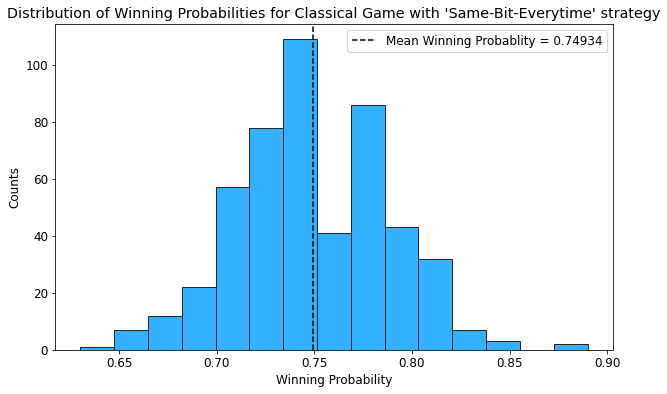

In [4]:
'''Playing classical game with predecided, same, non-random output bits'''
c_res_arr = np.array([])
for i in range(500):
    res = samebit_CGame()
    c_res_arr = np.append(c_res_arr, res)
c_avg = np.mean(c_res_arr)
print("Mean Winning Probability = ", c_avg)

plt.figure("fig2"); 
plt.hist(c_res_arr, bins = 15, histtype = 'bar', color = "#33B1FF", edgecolor = "#242526"); 
plt.axvline(x = c_avg, color = "black", ls = "--", label = ("Mean Winning Probablity = {:.5}".format(c_avg))); 
plt.xlabel("Winning Probability"); 
plt.ylabel("Counts"); 
plt.title("Distribution of Winning Probabilities for Classical Game with 'Same-Bit-Everytime' strategy")
plt.legend(); 

Our prediction was correct! After playing the game $50000$ times with both strategies, it is clear that the <b>Random Output</b> strategy worked just about half the time, whereas the <b>Same Output</b> strategy helped them win nearly three out of four times. <br>

Let us pause for a moment to consider whether this is the best Alice and Bob can achieve. Can they devise a strategy that allows them to win more (than $75$% of the time)? Hmm... <br>
What if I told you that's the best they can accomplish *classically*? Believe it or not, any classical strategy can only raise their odds of winning by $75$%. <hr>

Okay, it's time to improve our game and add some **quantum** mechanics to our winning strategy. <br>
Let Alice and Bob agree to take a *piece* of the following entangled state with them, where subscript indicates which party owns that *piece* 
$$|\Psi\rangle = \frac{|0\rangle _A |0\rangle _B + |1\rangle _A |1\rangle _B}{\sqrt{2}}.$$

To be accurate, rather than using the word "piece," I should use "qubit." <br>

Our first challenge is constructing an engtangled state. Lucky for us, we have got the access to IBM's cutting-edge quantum computing facility! <br>

To construct this entangled state, we simply need to apply Hadamard gate on the first qubit (which is always in $|0\rangle$ state initially). The Hadamard gate (denoted by $H$) transforms $|0\rangle$ into a superposition of $|0\rangle$ and $|1\rangle$ i.e. $$H|0\rangle = \frac{|0\rangle+|1\rangle}{\sqrt2}.$$ 

Please take a note of the ghostly <span style="background-color: #BF94E4">$R_y$</span> gate in ```chsh_circuit()```. We will talk about it when we discuss the quantum strategies for Alice and Bob. For the time being, all you need to know is that it rotates the qubits by an angle $\theta$.

Example circuit with theta_alice = pi/4 and theta_bob = pi/8


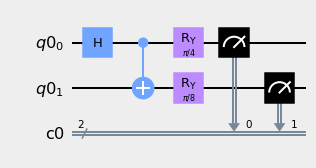

In [5]:
def chsh_circuit(theta_alice, theta_bob):

    q = QuantumRegister(2)
    c = ClassicalRegister(2)
    qc = QuantumCircuit(q, c)
    
    # Circuit
    qc.h(0)
    qc.cx(0, 1)
    qc.ry(theta_alice, q[0])
    qc.ry(theta_bob, q[1])
    qc.measure(range(2),range(2))

    return qc

'''example circuit'''
print("Example circuit with theta_alice = pi/4 and theta_bob = pi/8")
example_circ = chsh_circuit(np.pi/4, np.pi/8)
example_circ.draw(output='mpl', style={'backgroundcolor': '#EEEEEE'})

What if Alice and Bob decide to give their qubits a little leeway? Just enough so that their qubits have a high likelihood of collapsing into the same state if both $x$ and $y$ are not $1$, and a high likelihood of collapsing into distinct states if both $x$ and $y$ are $1$. But wait a minute, is that even possible? <br>

Sure thing! This is a real possibility! If Alice and Bob choose to rotate their qubits, for example, by $\theta^0_A$ and $\theta^0_B$ if either of their (individual) inputs is $0$ and by $\theta^1_A$ and $\theta^1_B$ if input is $1$, they can do so! Now that's why there is $R_y$ gate in ```chsh_circuit()```. <br>

We will build our quantum strategies around these angles.

#### Strategy 1: Fixed Rotation
Let us fix $$\theta^0_A = 0 \text{ and } \theta^0_B = \pi/8 $$ $$\theta^1_A = \pi/4 \text{ and } \theta^1_B = -\pi/8$$
If you feel this is an arbitary choice, hold on to that feeling. We shall return to it very soon. 

In [6]:
'''Function for quantum game with non-random rotations of qubits'''
def QGame(n_exp = 100):     # number of experiments

    n_win = 0   # number of times alice and bob win

    for i in range(n_exp):
        '''random input bit from the referee'''
        x, y = random.choices([0, 1], k = 2)

        '''defining angles of both the parties based on input bit'''
        if(x == 0):
            theta_a = 0
        else:
            theta_a = np.pi/4
        if(y == 0):
            theta_b = np.pi/8
        else:
            theta_b = -np.pi/8

        quantum_circuit = chsh_circuit(theta_a, theta_b)
        result = execute(quantum_circuit, backend= sim, shots = 1).result()
        counts = result.get_counts()

        '''parsing the outcome and assigning output bit for the parties'''
        out_bit = str(list(counts.keys())[0])

        '''a = output bit from alice; b = output bit from bob'''
        if(out_bit[0] == '0'):
            a = 0
        else:
            a = 1   
        if(out_bit[1] == '0'):
            b = 0
        else:
            b = 1
        
        if ((x*y) == (a^b)):    # checking whether parties won the game
            n_win += 1
            
    return float(n_win/n_exp)

Mean Winning Probability =  0.799


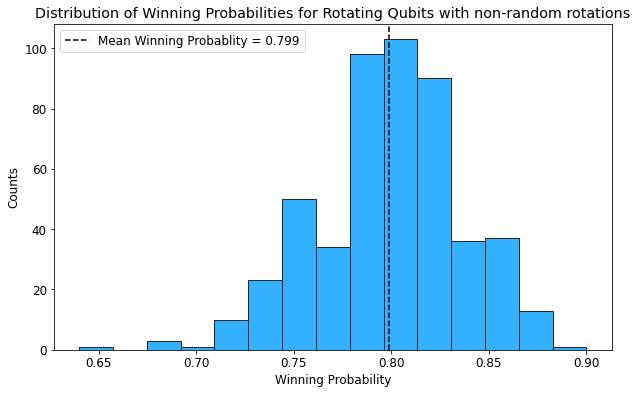

In [7]:
'''Playing quantum game with predecided, non-random rotations of qubits'''
q_res_arr = np.array([])
for i in range(500):
    res = QGame()
    q_res_arr = np.append(q_res_arr, res)
q_avg = np.mean(q_res_arr)
print("Mean Winning Probability = ", q_avg)

plt.figure("fig3"); 
plt.hist(q_res_arr, bins = 15, histtype = 'bar', color = "#33B1FF", edgecolor = "#242526"); 
plt.axvline(x = q_avg, color = "black", ls = "--", label = ("Mean Winning Probablity = {:.5}".format(q_avg))); 
plt.xlabel("Winning Probability"); 
plt.ylabel("Counts"); 
plt.title("Distribution of Winning Probabilities for Rotating Qubits with non-random rotations")
plt.legend(); 

#### Strategy 2: Random Rotation

This is the strategy for those of us who could not digest the choice of angles in strategy $1$. Here, Alice and Bob can do a coin-flip and choose to rotate their qubits by any arbitrary angle. However, I have restricted the number of random choices (for angles) to $9$ because computations take a long time on my local machine. You should feel free to make changes and explore explore the results at other angles.

In [8]:
'''Function for discrete, random qubit rotation to study the behavior of winning 
    probablities against various angles of rotation for the bipartite state'''
def Rot_QGame(n_exp = 20):     # number of experiments

    n_win = 0   # number of times alice and bob win

    '''defining random angles of both the parties'''
    theta_range = np.linspace(0, np.pi/2, 9) 
    theta_a, theta_b = random.choices(theta_range, k = 2)

    for i in range(n_exp):
        '''random input bit from the referee'''
        x, y = random.choices([0, 1], k = 2)

        quantum_circuit = chsh_circuit(theta_a, theta_b)
        result = execute(quantum_circuit, backend= sim, shots = 1).result()
        counts = result.get_counts()

        '''parsing the outcome and assigning output bit for the parties'''
        out_bit = str(list(counts.keys())[0])

        '''a = output bit from alice; b = output bit from bob'''
        if(out_bit[0] == '0'):
            a = 0
        else:
            a = 1   
        if(out_bit[1] == '0'):
            b = 0
        else:
            b = 1
        
        if ((x*y) == (a^b)):    # checking whether parties won the game
            n_win += 1
            
    return float(n_win/n_exp), theta_a, theta_b

'''A function to sort winning probabilities of a particular angle and return a list of 
    mean of winning probabilties corresponding to every angle and the list of all the angles'''
def sort_winProb(keys, values):
    zipped_list = list(zip(keys, values))
    
    d = defaultdict(list)
    for i, j in zipped_list:
        d[i].append(j)

    resdict = {}
    for key in d.keys():
        resdict[key] = np.mean(d[key])
    angles = resdict.keys()
    mean_winprob = resdict.values()

    return angles, mean_winprob

Mean Winning Probability =  0.6585000000000001


<Figure size 720x432 with 0 Axes>

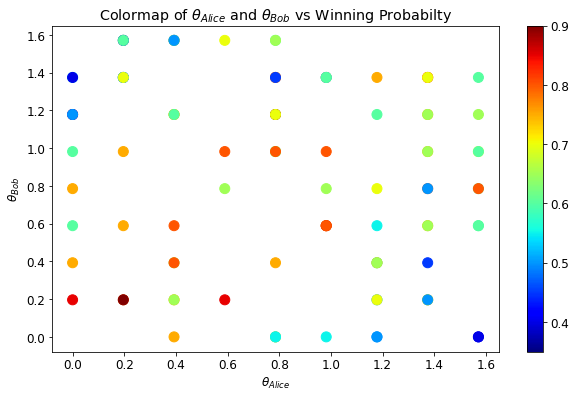

In [9]:
'''Quantum Game with predecided, random rotations of qubits'''
rot_res_arr = np.array([])
ta_arr = np.array([])
tb_arr = np.array([])
for i in range(100):
    res, ta, tb = Rot_QGame()
    rot_res_arr = np.append(rot_res_arr, res)
    ta_arr = np.append(ta_arr, ta)
    tb_arr = np.append(tb_arr, tb)

mean = np.mean(rot_res_arr)
print("Mean Winning Probability = ", mean)

plt.figure("fig4"); 
fig = plt.figure(); 
ax = fig.add_subplot(111); 

plot = ax.scatter(ta_arr, tb_arr, s = 100, c = rot_res_arr, marker = "o", cmap = cm.jet); 
plt.colorbar(plot); 
plt.xlabel("$\\theta_{Alice}$"); 
plt.ylabel("$\\theta_{Bob}$"); 
plt.title("Colormap of $\\theta_{Alice}$ and $\\theta_{Bob}$ vs Winning Probabilty"); 

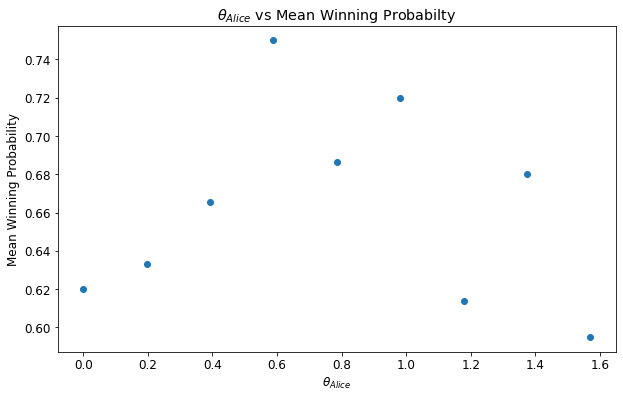

In [10]:
plt.figure("fig5")
alice, res_A = sort_winProb(ta_arr, rot_res_arr)
plt.scatter(alice, res_A); 
plt.xlabel("$\\theta_{Alice}$"); 
plt.ylabel("Mean Winning Probability"); 
plt.title("$\\theta_{Alice}$ vs Mean Winning Probabilty"); 

In [11]:
a_75 = []
b_75 = []
win_p = []

for i in range(len(rot_res_arr)):
    if(rot_res_arr[i] > 0.75):
        a_75.append(ta_arr[i])
        b_75.append(tb_arr[i])
        win_p.append(rot_res_arr[i])

dict = {"theta Alice": a_75,
        "theta Bob": b_75,
        "Difference": np.abs(np.array(a_75) - np.array(b_75)),
        "Winning Probability": win_p
        }

df = pd.DataFrame(dict)
print(df)

    theta Alice  theta Bob  Difference  Winning Probability
0      0.981748   0.981748    0.000000                 0.80
1      1.374447   0.785398    0.589049                 0.80
2      1.374447   1.374447    0.000000                 0.80
3      0.981748   0.589049    0.392699                 0.85
4      0.785398   1.374447    0.589049                 0.85
5      0.000000   1.178097    1.178097                 0.80
6      0.981748   0.589049    0.392699                 0.85
7      0.589049   0.981748    0.392699                 0.80
8      0.981748   0.589049    0.392699                 0.80
9      0.981748   1.374447    0.392699                 0.85
10     0.392699   0.392699    0.000000                 0.80
11     0.196350   0.196350    0.000000                 0.80
12     1.374447   1.374447    0.000000                 0.80
13     0.589049   0.196350    0.392699                 0.85
14     0.392699   0.589049    0.196350                 0.80
15     0.785398   1.178097    0.392699  

*Bang!* Did you catch that? <br>

**Fixed Rotation** strategy yields a winning probability of 80%! However **Random Rotation** strategy does not turn out to be so good (Perhaps because we only used this strategy $2000$ times). We have finally found a better strategy then our classical ones! <br>

Nevertheless, we are still left with two questions:
1. Why did I choose those specific angles in the **Fixed Rotation** strategy?
2. Is it possible to devise an even better strategy?

The answer to question 2 is significantly simpler. <br>
No, thanks to [[4]](#references), who demonstrated that the upper bound on Alice and Bob's winning probability is $\sim 85$% for all quantum-like theories! But, if the highest bound is $\sim 85$%, how come we only got $80$%? <br>

The strongest argument I could think of was that we hadn't played the game enough times! (Anecdotally, Alain Aspect also achieved $80$% when he experimentally validated the CHSH inequality. The controversy over whether $80$% is the "physical" upper bound on such inequities continues to this day). <br>

Answer to question 1 is much more mathematically involved. When one breaks out the math, one ends up probability in the form of $\cos^2(\theta^i_A-\theta^j_B) \text{ such that } (i, j \in [0, 1]).$  And the angles chosen in the **Fixed Rotation** strategy offers the highest probability i.e. $\cos^2(\pi/8) \sim 85$%. <br>
observe how $\pi/8$ appears the most ($7$) times in the Difference column of the table above. Although not rigorous, it is a good indicator that rotation angles defined in **Fixed Rotation** are up to something! <br>

In case you are still not satisfied, I intend to publish and attach a breif article describing the mathematics underlying the method here for any who are interested. <hr>

### References

1. Quantum Computation and Quantum Information, *M. Neilson* and *I. Chuang*, Pg 111
2. [Local Reality and the CHSH Inequality, Qiskit Textbooks, IBM Quantum](https://qiskit.org/textbook/ch-demos/chsh.html)
3. [CHSH Game Tutorial, Qiskit Community Code, Github](https://github.com/qiskit-community/qiskit-community-tutorials/blob/master/awards/teach_me_qiskit_2018/chsh_game/CHSH%20game-tutorial.ipynb)
4. [Tsirelson's Bound](https://en.wikipedia.org/wiki/Tsirelson%27s_bound)
5. [Intro. To Quantum Computing, Handouts, UCLA](https://circles.math.ucla.edu/circles/lib/data/Handout-2987-2567.pdf) [Not cited]
<hr>

<h2 align=center> Thanks for sticking around and playing this game! Hope you had fun ;)</h2>